In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [7]:
df = pd.read_csv("Copy of sonar data.csv", header = None)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [19]:
X = df.drop(columns = 60, axis = 1)
y = df[60]

In [23]:
y.shape, X.shape

((208,), (208, 60))

In [61]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y, train_size = 0.7, shuffle = True, random_state = 42, stratify = y)


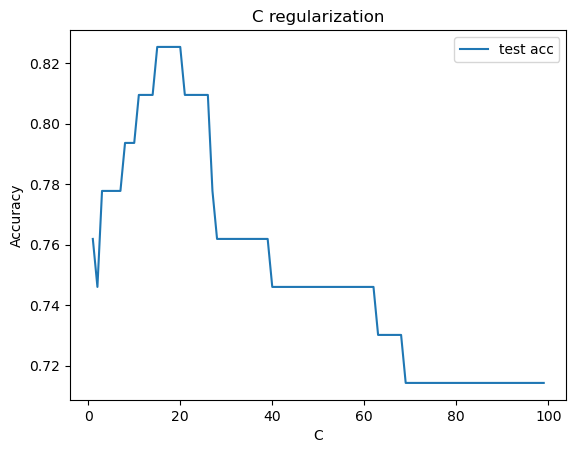

In [89]:

c = np.arange(1,100,1)

alphas = []
accs = []

for i in c:

    model = LogisticRegression(C = i, max_iter = 1000)

    model.fit(X_tr, y_tr)

    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    acc_tr = accuracy_score(y_pred_tr, y_tr)
    acc_te = accuracy_score(y_pred_te, y_te)
    
    alphas.append(i)
    accs.append(acc_te)
    
    
plt.plot(alphas,accs, label = "test acc")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("C regularization")
plt.legend()
plt.show()

In [100]:
model = LogisticRegression(C = 18)

model.fit(X_tr,y_tr)

y_pred_te = model.predict(X_te)

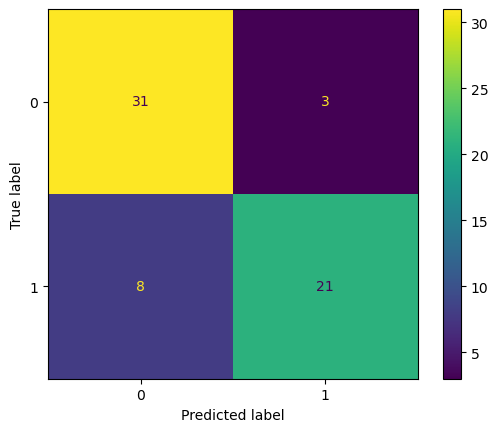

In [101]:
ConfusionMatrixDisplay(confusion_matrix(y_te,y_pred_te)).plot()

In [105]:
model = LogisticRegression(C = 18)

model.fit(X_tr,y_tr)

y_pred_te = model.predict(X_te)

accuracy_score(y_pred_te, y_te)

0.8253968253968254

In [106]:
y_te.shape

(63,)

In [119]:
y_te.value_counts()

60
M    34
R    29
Name: count, dtype: int64